<p style="text-align: center; font-size: 30px;">ANEXO</p>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Avisos
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("heloc.csv")

# 1. Creacion de columnas boleanas para cada valor especial

In [28]:
def col_datos_esp(df, columnas):
    
    for col in columnas:
        
        df[f"{col}_-9"] = df[col].apply(lambda x:x == -9)
        df[f"{col}_-8"] = df[col].apply(lambda x: x == -8)
        df[f"{col}_-7"] = df[col].apply(lambda x: x == -7)
        
    return df

In [29]:
resto_casos = df[~(df.iloc[:, 1:] <= 0).all(axis=1)]

filas_con_valores_esp = resto_casos[(resto_casos.iloc[:, 1:].apply(lambda row: any(row < 0), axis=1))]

In [35]:
num_val_esp = filas_con_valores_esp.iloc[: , 1:].applymap(lambda x: x < 0).sum().to_frame(name= "num_valores_esp").sort_values(by= "num_valores_esp", ascending= False)
num_val_esp[num_val_esp["num_valores_esp"] > 0]

,num_valores_esp
MSinceMostRecentDelq,4840
NetFractionInstallBurden,3419
MSinceMostRecentInqexcl7days,2331
NumInstallTradesWBalance,861
NumBank2NatlTradesWHighUtilization,583
MSinceOldestTradeOpen,239
NetFractionRevolvingBurden,186
NumRevolvingTradesWBalance,156
PercentTradesWBalance,18
ExternalRiskEstimate,10


In [36]:
num_val_esp[num_val_esp["num_valores_esp"] > 0].index

Index(['MSinceMostRecentDelq', 'NetFractionInstallBurden',
       'MSinceMostRecentInqexcl7days', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'MSinceOldestTradeOpen',
       'NetFractionRevolvingBurden', 'NumRevolvingTradesWBalance',
       'PercentTradesWBalance', 'ExternalRiskEstimate'],
      dtype='object')

In [37]:
cols = num_val_esp[num_val_esp["num_valores_esp"] > 0].index
nuevo_df = col_datos_esp(df, cols)
df_temp = nuevo_df.select_dtypes(include = bool)
df_temp["RiskPerformance"] = df["RiskPerformance"].apply(lambda x: 1 if x == "Bad" else 0)

In [38]:
cols_desbalanceadas = ["MSinceMostRecentDelq_-7", "MSinceMostRecentInqexcl7days_-8", "NumBank2NatlTradesWHighUtilization_-8", "NetFractionRevolvingBurden_-8", "NumRevolvingTradesWBalance_-8", "PercentTradesWBalance_-8", "suma_negs"]

In [39]:
for col in df_temp.columns:
    print(df_temp.groupby(by= col)["RiskPerformance"].value_counts(normalize= True), df_temp[col].value_counts())
    print("-----------------------------------------------\n")

MSinceMostRecentDelq_-9  RiskPerformance
False                    1                  0.520312
                         0                  0.479688
True                     1                  0.549320
                         0                  0.450680
Name: proportion, dtype: float64 MSinceMostRecentDelq_-9
False    9871
True      588
Name: count, dtype: int64
-----------------------------------------------

MSinceMostRecentDelq_-8  RiskPerformance
False                    1                  0.520762
                         0                  0.479238
True                     1                  0.590909
                         0                  0.409091
Name: proportion, dtype: float64 MSinceMostRecentDelq_-8
False    10283
True       176
Name: count, dtype: int64
-----------------------------------------------

MSinceMostRecentDelq_-7  RiskPerformance
False                    1                  0.621053
                         0                  0.378947
True                     

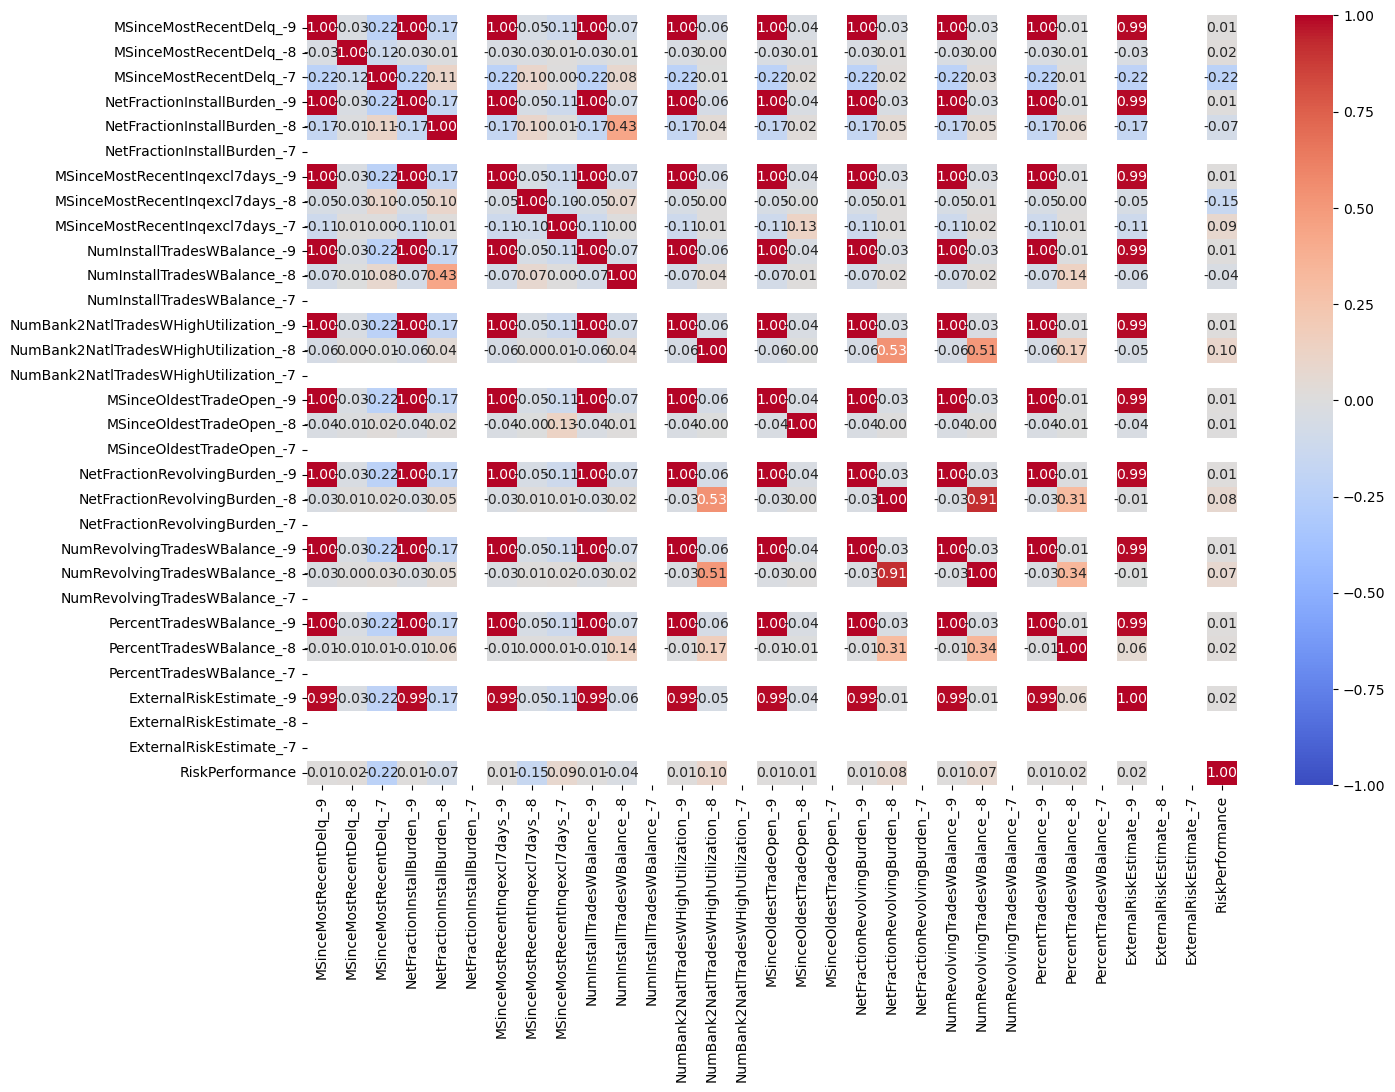

In [40]:
plt.figure(figsize = (15,10))
sns.heatmap(df_temp.corr(), vmin = -1, vmax = 1, annot = True, cmap= "coolwarm", fmt='.2f')
plt.show()

In [41]:
df_temp["suma_negs"] = df_temp[df_temp.columns[:-1]].sum(axis = 1)
df_temp.groupby(by= "suma_negs")["RiskPerformance"].value_counts()

suma_negs  RiskPerformance
0          1                  1560
           0                   942
1          1                  1985
           0                  1878
2          0                  1216
           1                  1025
3          0                   535
           1                   371
4          0                   140
           1                   131
5          1                    42
           0                    17
6          1                     8
           0                     4
7          1                     7
           0                     2
8          1                     5
           0                     1
9          1                     2
10         1                   323
           0                   265
Name: count, dtype: int64

In [20]:
df_temp.groupby(by= col)["RiskPerformance"].value_counts(normalize= True)

RiskPerformance
0    1.0
1    1.0
Name: proportion, dtype: float64